# LOAN DATA

### person_gender e loan_percent_income le escluderemo poichè irrilevanti

#### 1. **person_age**

Tipo: Numerico

Importanza: Alta – L’età può influenzare la probabilità di ricevere un prestito (es. giovani vs pensionati).

Note: Verificare la presenza di outlier (età irrealistiche).

#### 2. **person_education**
Categorical

Descrizione: Livello di istruzione più alto raggiunto (es. high school, college, bachelor, master).

Importanza: Un'istruzione più elevata può essere correlata a redditi più alti e quindi maggiore affidabilità creditizia.

Possibili relazioni: Titoli universitari o post-universitari possono essere associati a tassi di approvazione più elevati.

#### 3. **person_income**

Tipo: Numerico - Float

Importanza: Alta – Il reddito è un fattore chiave per valutare la solvibilità del richiedente.

Possibili relazioni: Redditi più alti spesso portano a maggiore probabilità di approvazione. Tuttavia, valori estremi potrebbero contenere outlier o errori.

Note: Distribuzione potrebbe essere sbilanciata (log-transform se molto skewed).

#### 4. **person_emp_exp**

Tipo: Integer

Importanza: Alta – L’esperienza lavorativa riflette la stabilità del reddito.

Possibili relazioni: Esperienza maggiore → minore rischio → più probabilità di approvazione. Tuttavia, può essere legata anche all’età.

Note: Convertire in intero o ordinali (es. 0 = “<1 anno”, 1 = “1 anno”, … 10 = “10+ anni”). Può avere valori mancanti o ambigui.

#### 5. **person_home_ownership**

Tipo: Categorical

Descrizione: Tipo di possesso della casa (es. rent, own, mortgage).

Importanza: I proprietari di casa tendono ad avere profili di rischio più bassi. Il mutuo indica un debito in corso.

Possibili relazioni:

Own: Maggiore affidabilità percepita.

Rent: Potenzialmente più rischiosi.

Mortgage: Situazione intermedia, ma indica già un'esposizione finanziaria.

#### 6. **loan_amnt**

Float

Descrizione: Importo richiesto per il prestito.

Importanza: L'entità del prestito influenza il rischio complessivo. Richieste troppo alte possono essere respinte se non compatibili con il reddito.

Possibili relazioni: Prestiti troppo alti rispetto al reddito o alla storia creditizia sono meno probabili da approvare.

#### 7. **loan_intent**

Categorical

Descrizione: Finalità del prestito (es. education, medical, personal, home, debt consolidation).

Importanza: Alcuni tipi di prestito sono considerati più rischiosi di altri. Ad esempio, prestiti per “debt consolidation” possono indicare difficoltà finanziarie pregresse.

Possibili relazioni:

Home/Medical/Education: Solitamente visti come investimenti.

Personal/Debt consolidation: Potrebbero avere tassi di rifiuto più alti.

#### 8. . **loan_int_rate**

Float

Descrizione: Tasso d’interesse del prestito.

Importanza: Un tasso più alto può essere un segnale che il richiedente è stato considerato più rischioso dalla banca.

Possibili relazioni: Tassi elevati → rischio percepito più alto → correlazione con la probabilità di rifiuto.

#### 9. **cb_person_cred_hist_length**

Float

Descrizione: Lunghezza della storia creditizia (in anni).

Importanza: Una storia creditizia più lunga permette una valutazione più affidabile del comportamento finanziario.

Possibili relazioni: Una lunga storia creditizia senza incidenti può aumentare la probabilità di approvazione.

#### 10. **credit_score**

Integer

Descrizione: Valutazione numerica dell’affidabilità creditizia.

Importanza: Estremamente rilevante. Un punteggio più alto significa rischio più basso.

Possibili relazioni: Valori bassi (<600) sono spesso associati a rifiuti; valori alti (>700) a approvazioni.

#### 11. **previous_loan_defaults_on_file**

Categorical

Descrizione: Indicatore se ci sono stati precedenti default su prestiti.

Importanza: Altamente indicativo di rischio. La presenza di default passati può far rifiutare automaticamente una richiesta.

Possibili relazioni:

Yes: Altissimo rischio → bassa probabilità di approvazione.

No: Profilo più sicuro.

#### 12. **loan_status**

Target Variable

Descrizione: 1 = approvato, 0 = rifiutato.

Obiettivo: Prevedere questa variabile in base agli altri fattori.

Strategia: Può essere prevista tramite modelli di classificazione (es. logistic regression, random forest, XGBoost).

## **EDA**

Caricare il dataset e dare un'occhiata generale (vedere le prime righe del dataset e capire come sono fatte le colonne).

In [1]:
#importiamo le librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
#carichiamo il csv
df = pd.read_csv('data/loan_data.csv')

In [4]:
# Verifichiamo righe/colonne, tipi, NaN.
# Dimensione del dataset
df.shape  # Righe, colonne
df.info()  # Tipi di dati + null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
# 1. Per visualizzare i numeri float senza notazione scientifica (fino a un certo numero di decimali)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Questo imposterà tutti i numeri float nel DataFrame ad avere 2 cifre decimali e disattiverà la notazione scientifica per la visualizzazione.
# Se vuoi più o meno decimali, cambia '%.2f' (es. '%.0f' per interi, '%.4f' per 4 decimali).

df.describe(include='all')  # Statistiche generali, anche categoriche

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.00,45000,45000,45000.00,45000.00,45000,45000.00,45000,45000.00,45000.00,45000.00,45000.00,45000,45000.00
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.76,NaN,NaN,80319.05,5.41,NaN,9583.16,NaN,11.01,0.14,5.87,632.61,NaN,0.22
std,6.05,NaN,NaN,80422.50,6.06,NaN,6314.89,NaN,2.98,0.09,3.88,50.44,NaN,0.42
min,20.00,NaN,NaN,8000.00,0.00,NaN,500.00,NaN,5.42,0.00,2.00,390.00,NaN,0.00
25%,24.00,NaN,NaN,47204.00,1.00,NaN,5000.00,NaN,8.59,0.07,3.00,601.00,NaN,0.00
50%,26.00,NaN,NaN,67048.00,4.00,NaN,8000.00,NaN,11.01,0.12,4.00,640.00,NaN,0.00
75%,30.00,NaN,NaN,95789.25,8.00,NaN,12237.25,NaN,12.99,0.19,8.00,670.00,NaN,0.00


In [6]:
df.head(100) # Visualizzare le prime 100 righe

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.00,female,Master,71948.00,0,RENT,35000.00,PERSONAL,16.02,0.49,3.00,561,No,1
1,21.00,female,High School,12282.00,0,OWN,1000.00,EDUCATION,11.14,0.08,2.00,504,Yes,0
2,25.00,female,High School,12438.00,3,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3.00,635,No,1
3,23.00,female,Bachelor,79753.00,0,RENT,35000.00,MEDICAL,15.23,0.44,2.00,675,No,1
4,24.00,male,Master,66135.00,1,RENT,35000.00,MEDICAL,14.27,0.53,4.00,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.00,male,Associate,145092.00,0,RENT,25600.00,EDUCATION,12.69,0.18,3.00,557,Yes,0
96,24.00,female,Bachelor,15928.00,1,OWN,1600.00,MEDICAL,13.57,0.10,3.00,689,Yes,0
97,22.00,male,Bachelor,73131.00,3,RENT,25475.00,VENTURE,10.99,0.35,3.00,681,No,1
98,25.00,male,Master,281501.00,4,MORTGAGE,20000.00,MEDICAL,14.27,0.07,4.00,623,Yes,0


#### ETA' e ANNI STORIA CREDITIZIA DECIMALI?

In [7]:
#Conversione da float in int 'person_age' e 
df['person_age'] = df['person_age'].astype(int)
df['cb_person_cred_hist_length'] = df['cb_person_cred_hist_length'].astype(int)


In [8]:
# Identificare eventuali valori mancanti da trattare prima di analizzare.
df.isnull().sum().sort_values(ascending=False)

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

*NON CI SONO VALORI NULLI E I NaN SONO CORRETTI*

In [9]:
# filtriamo le età
df[df['person_age'] < 80]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948.00,0,RENT,35000.00,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282.00,0,OWN,1000.00,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438.00,3,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753.00,0,RENT,35000.00,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135.00,1,RENT,35000.00,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,male,Associate,47971.00,6,RENT,15000.00,MEDICAL,15.66,0.31,3,645,No,1
44996,37,female,Associate,65800.00,17,RENT,9000.00,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,male,Associate,56942.00,7,RENT,2771.00,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,male,Bachelor,33164.00,4,RENT,12000.00,EDUCATION,13.23,0.36,6,604,No,1


#### ETA' SBILANCIATE

In [10]:
#creiamo un dataframe con il filtraggio
df_filtrato = df[df['person_age'] < 80]

##### Analisi univariata (una variabile alla volta)

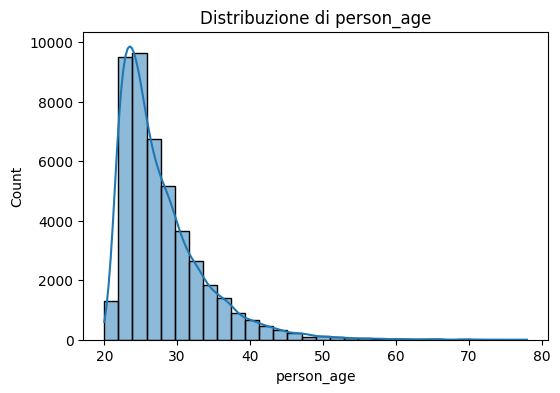

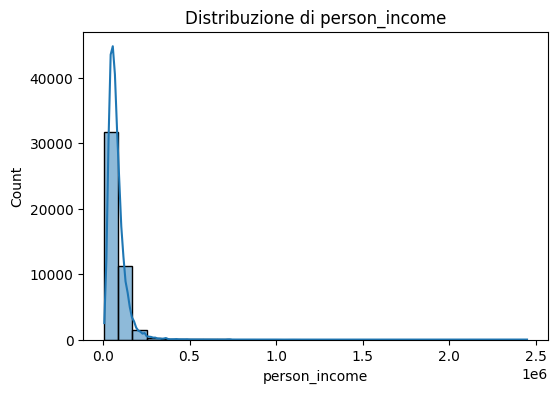

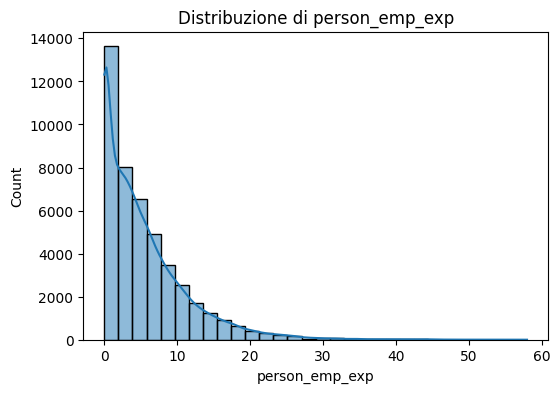

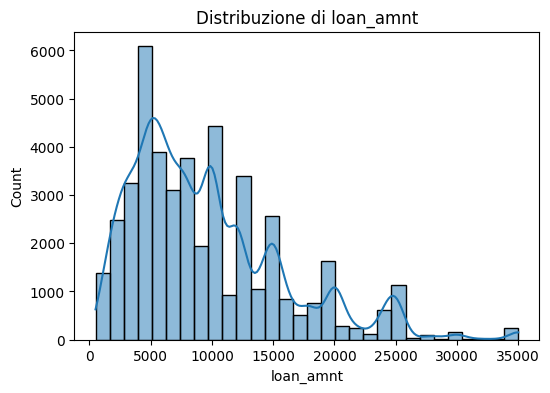

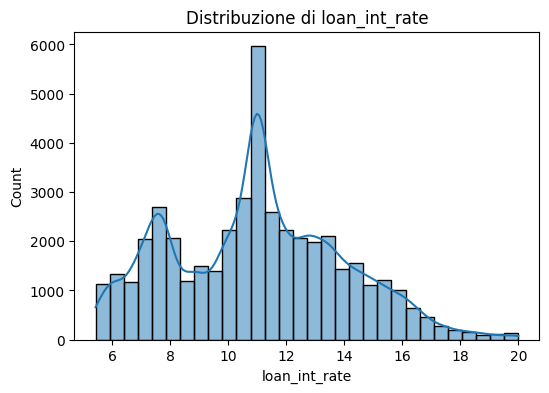

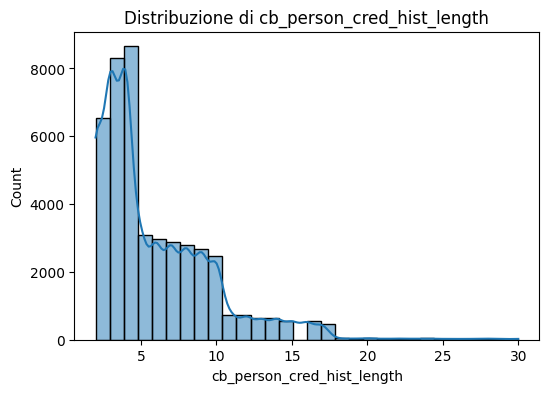

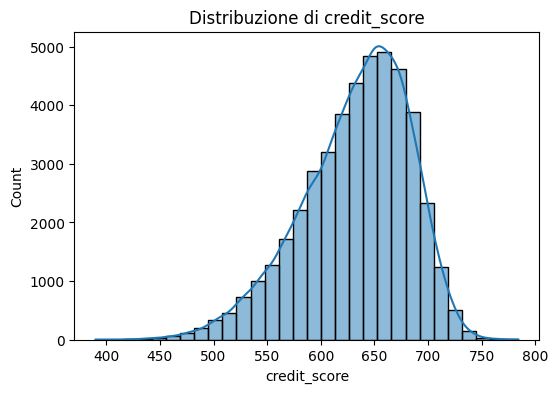

In [11]:
# Capire la distribuzione delle singole variabili.
numeriche = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
             'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']
#in questo modo abbiamo creato una lista delle variabili numeriche e con il df filtrato andiamo ad inserirle in un ciclo for 
# che crea un istogramma per ogni variabile
for col in numeriche:
    plt.figure(figsize=(6,4))
    sns.histplot(df_filtrato[col], kde=True, bins=30)
    plt.title(f"Distribuzione di {col}")
    plt.show()

**person_income** è fortemente sbilanciata verso i redditi bassi.
Altissima concentrazione di redditi bassi, pochi hanno redditi medi o alti.
Probabilmente ci sono outlier (redditi altissimi che “schiacciano” la visualizzazione).

#### Come visualizzare meglio questo dato?
Usare una scala logaritmica per visualizzare meglio i dati skewed:
La scala sull'asse Y è logaritmica (base 10):
Questo significa che ogni tacca principale rappresenta un incremento di un fattore 10 nel conteggio (es., da 1 a 10, da 10 a 100, ecc.), non un incremento lineare.

Perché la Scala Logaritmica?
Perché la distribuzione del reddito è tipicamente molto sbilanciata (skewed). 
La scala logaritmica serve proprio a:

1.Visualizzare la coda lunga: Permette di vedere chiaramente la presenza di valori elevati (anche se rari) che altrimenti si perderebbero.

2.Apprezzare le differenze tra piccoli conteggi: Rende visibili le differenze tra le frequenze più basse, che su una scala lineare apparirebbero tutte vicine allo zero.

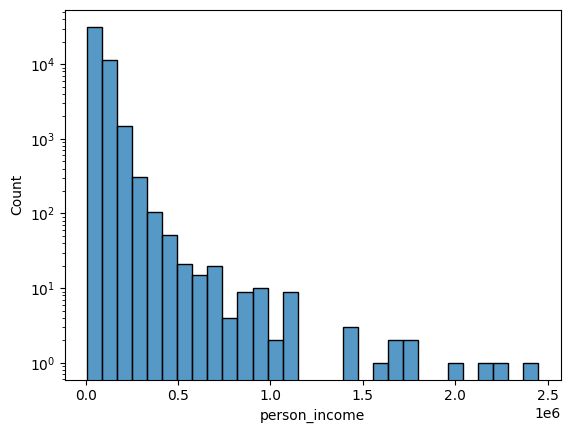

In [12]:
# Vediamo un po' questi redditi come sono distribuiti
sns.histplot(df_filtrato['person_income'], bins=30)
plt.yscale('log')  # Rende leggibile l’asse Y anche con grandi differenze
plt.show()

In [13]:
# Non avendo la forma Gaussiana (a campana) non si può applicare regola +-3 std

**QUINDI**
Nonostante la diminuzione rapida, la scala logaritmica ci permette di vedere chiaramente che ci sono ancora pochissime persone con redditi estremamente elevati.

Abbiamo la maggior parte delle persone che guadagna relativamente poco, e una piccola percentuale di individui con redditi estremamente elevati che si comportano come outlier.

Infatti, solo un piccolissimo gruppo di persone ha redditi molto, molto elevati. La scala logaritmica è stata fondamentale per riuscire a vedere sia la grande massa di redditi bassi che la scarsa presenza di redditi altissimi.

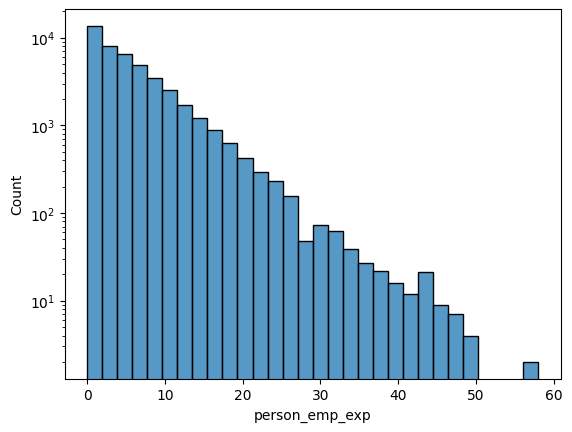

In [14]:
#INFINE CON GLI ANNI DI ESPERIENZA
sns.histplot(df_filtrato['person_emp_exp'], bins=30)
plt.yscale('log')  # Rende leggibile l’asse Y anche con grandi differenze
plt.show()

*CORRELAZIONE*
Vedere se alcune variabili numeriche sono correlate tra loro o con loan_status.

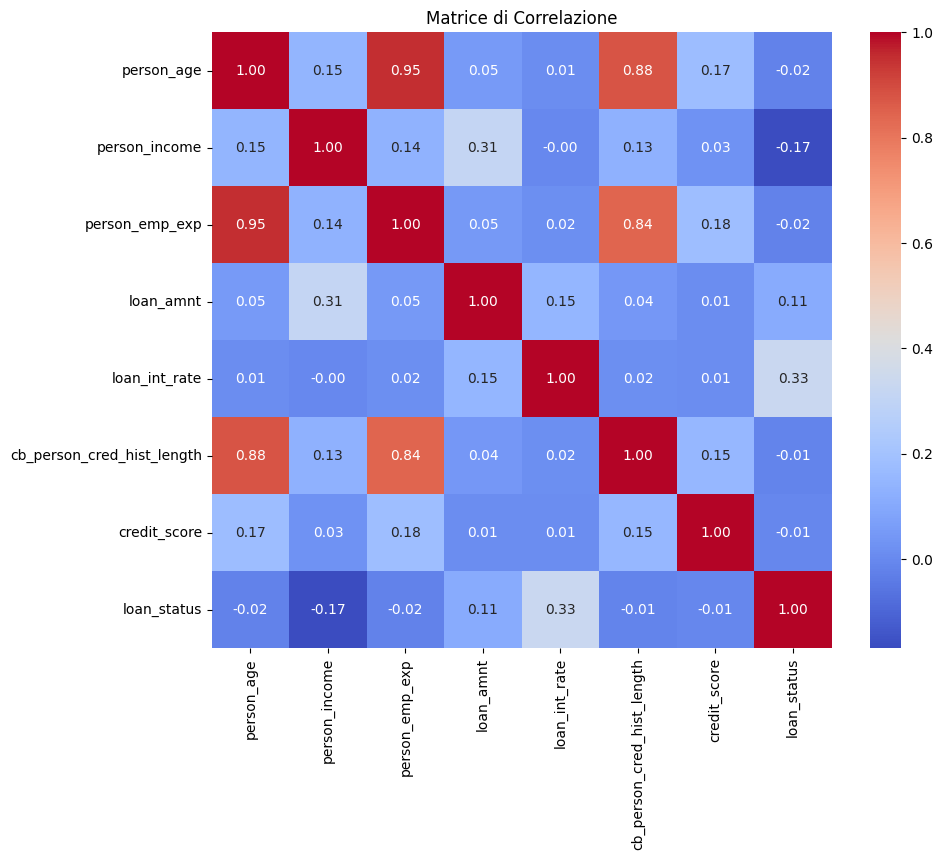

In [15]:
corr = df_filtrato[numeriche + ['loan_status']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice di Correlazione")
plt.show()

*DISTRIBUZIONE VARIABILI CATEGORICHE*

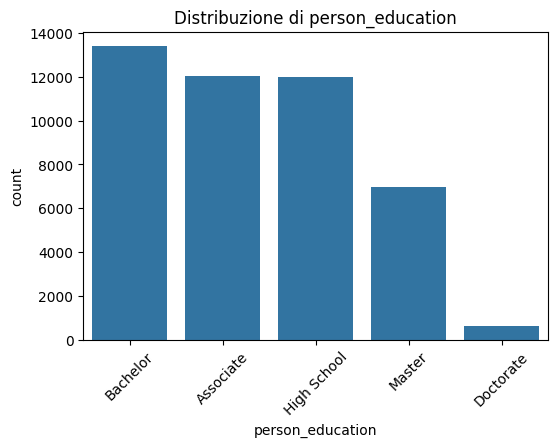

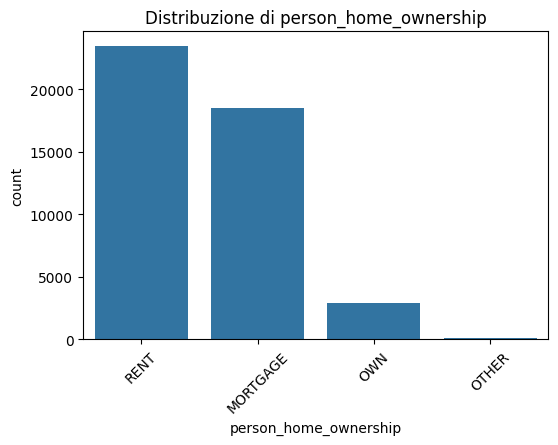

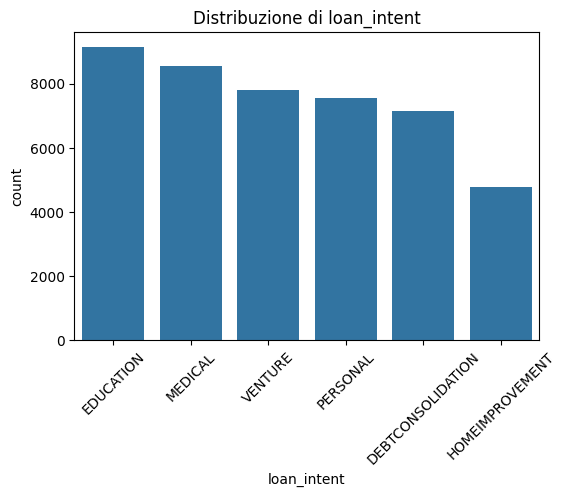

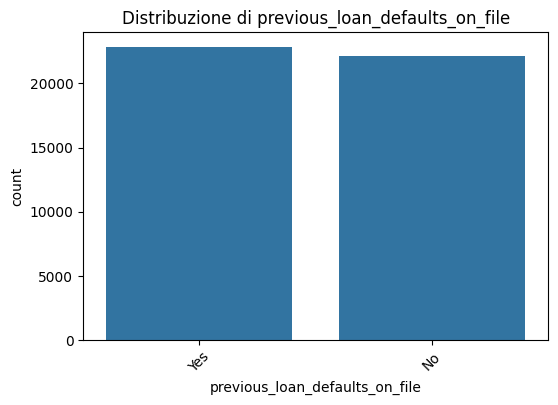

In [16]:
#Variabili categoriche
categoriche = ['person_education', 'person_home_ownership',
               'loan_intent', 'previous_loan_defaults_on_file']

for col in categoriche:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df_filtrato, x=col, order=df_filtrato[col].value_counts().index)
    plt.title(f"Distribuzione di {col}")
    plt.xticks(rotation=45)
    plt.show()

*Analisi bivariata (vs variabile target)*

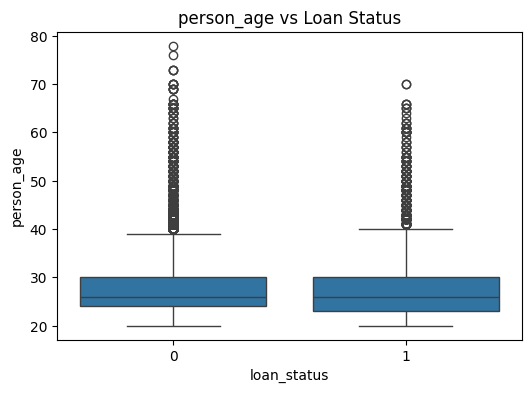

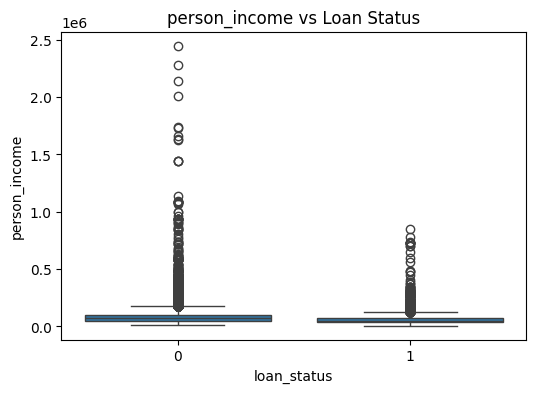

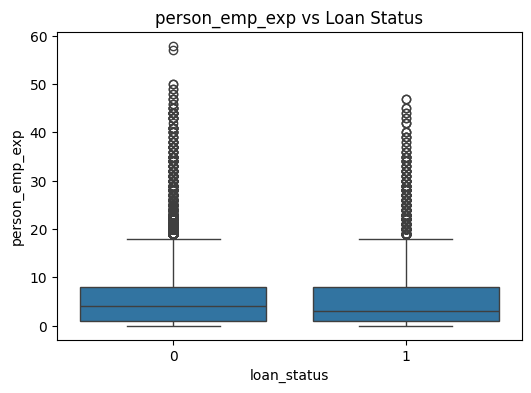

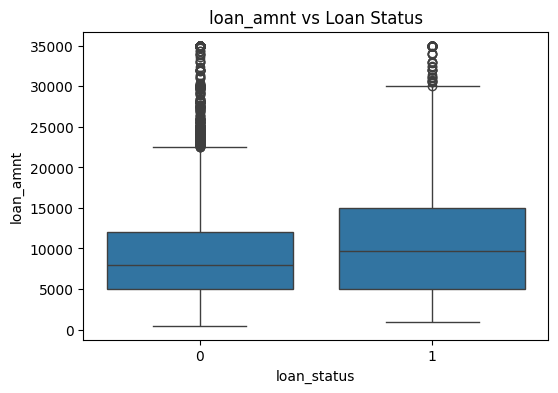

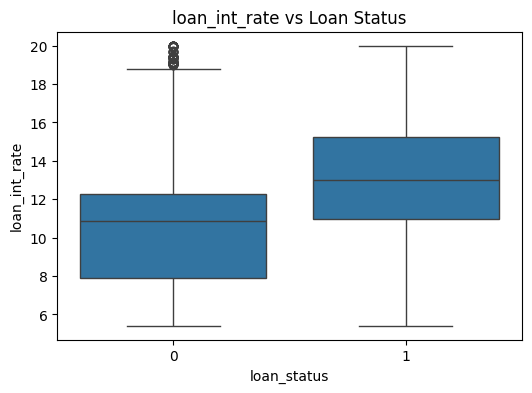

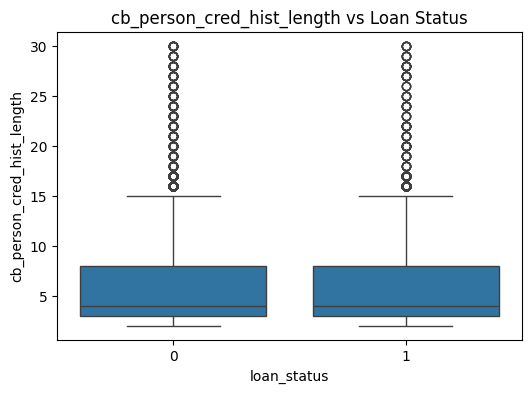

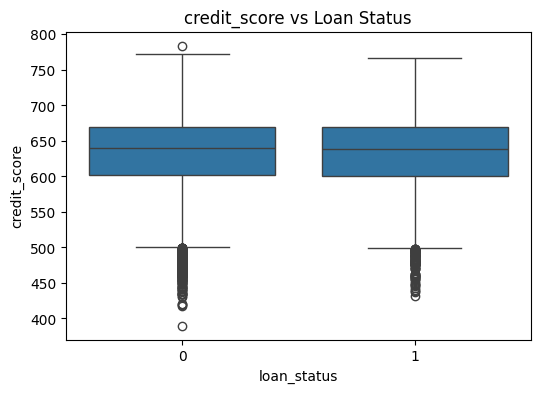

In [17]:
for col in numeriche:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df_filtrato)
    plt.title(f"{col} vs Loan Status")
    plt.show()

#### loan_amnt vs loan_status:

    Cosa si vede: Qui c'è una differenza visibile! La scatola dei prestiti loan_status = 1 (approvati) è spostata più in alto rispetto a quella dei prestiti loan_status = 0 (rifiutati). La mediana dei prestiti approvati è più alta di quella dei prestiti rifiutati.

    Cosa significa: I prestiti che vengono approvati tendono ad avere un importo più elevato rispetto a quelli che vengono rifiutati. Questo suggerisce che l'ammontare del prestito è un fattore rilevante per la decisione.

#### loan_int_rate vs loan_status:

    Cosa si vede: Anche qui c'è una differenza molto chiara. La scatola per i prestiti loan_status = 1 (approvati) è significativamente più in basso rispetto a quella per i prestiti loan_status = 0 (rifiutati). La mediana del tasso di interesse per i prestiti approvati è chiaramente più alta rispetto a quella dei prestiti rifiutati.

    Cosa significa: I prestiti che vengono approvati tendono ad avere tassi di interesse più alti, mentre i prestiti con tassi di interesse più bassi hanno maggiori probabilità di essere rifiutati. 

**QUINDI**

Da questi box plot, le variabili che sembrano avere la maggiore capacità di distinguere tra prestiti approvati e rifiutati sono loan_amnt (importo del prestito) e loan_int_rate (tasso di interesse). Le altre variabili come età, reddito, esperienza e storia creditizia mostrano distribuzioni molto simili per entrambi gli esiti del prestito, suggerendo che da sole potrebbero non essere i discriminanti principali.

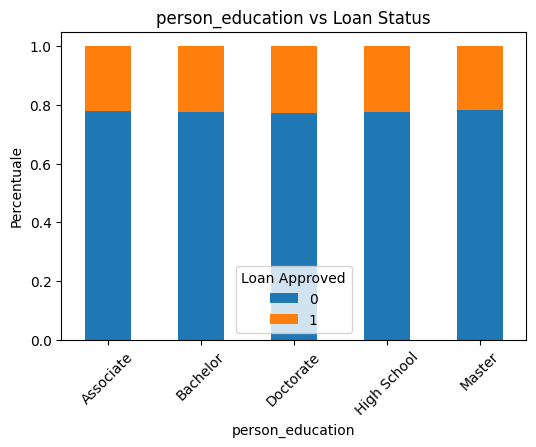

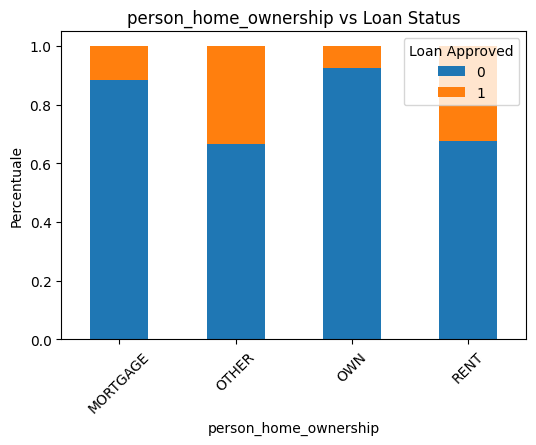

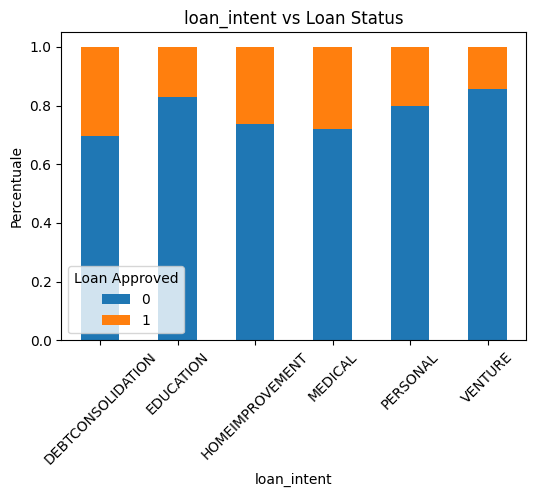

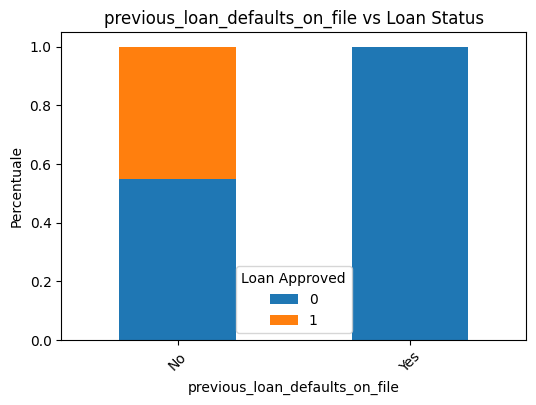

In [18]:
#Capire le categoriche vs loan_status
for col in categoriche:
    ctab = pd.crosstab(df_filtrato[col], df_filtrato['loan_status'], normalize='index')
    ctab.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f"{col} vs Loan Status")
    plt.ylabel('Percentuale')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Approved')
    plt.show()

### person_education vs Loan Status:

Cosa si vede: Tutte le categorie di istruzione (Associate, Bachelor, Doctorate, High School, Master) hanno una composizione molto simile per quanto riguarda l'approvazione/rifiuto del prestito. La percentuale di prestiti rifiutati (blu) e approvati (arancione) è quasi la stessa per tutti i livelli di istruzione.

Cosa significa: Il livello di istruzione della persona non sembra influenzare in modo significativo la probabilità che un prestito venga approvato o rifiutato.

### person_home_ownership vs Loan Status:

Cosa si vede:
Le categorie MORTGAGE, OWN, e RENT mostrano una percentuale di prestiti rifiutati (blu) molto alta, simile a quella vista per l'istruzione.
La categoria OTHER è diversa: ha una percentuale di prestiti rifiutati (blu) significativamente più bassa (circa il 65-70%) e, di conseguenza, una percentuale di prestiti approvati (arancione) più alta (circa il 30-35%) rispetto alle altre categorie.

Cosa significa: La condizione di OTHER (probabilmente un'altra forma di proprietà o situazione abitativa non categorizzata) sembra essere associata a una maggiore probabilità di approvazione del prestito rispetto ad avere un mutuo, essere proprietari o essere in affitto. Questo è un insight interessante che potrebbe meritare un'indagine più approfondita per capire cosa significhi "OTHER".

### loan_intent vs Loan Status:

Cosa si vede: Anche qui, le percentuali di approvazione/rifiuto sono abbastanza simili tra la maggior parte delle intenzioni di prestito. Le categorie come DEBTCONSOLIDATION, EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL e VENTURE mostrano tutte una grande maggioranza di prestiti rifiutati (blu) e una minoranza approvati (arancione).

Cosa significa: L'intenzione specifica del prestito, da sola, non sembra essere un fattore decisivo per l'approvazione o il rifiuto del prestito nella maggior parte dei casi. I modelli di rischio della banca potrebbero non fare una grande distinzione basata solo sullo scopo dichiarato del prestito.

### previous_loan_defaults_on_file vs Loan Status:

Cosa si vede: Questo è il grafico più chiaro e con la differenza più marcata!
Per No (nessun default precedente): la maggior parte dei prestiti sono rifiutati (blu, circa 60%) e una minoranza è approvata (arancione, circa 40%).
Per Yes (default precedenti): TUTTI i prestiti mostrati in questa categoria sono rifiutati (barra completamente blu). Non c'è una parte arancione.

Cosa significa: Avere dei default precedenti registrati è un fattore estremamente forte di rifiuto del prestito. Le persone che hanno avuto precedenti default hanno una probabilità quasi nulla di ottenere un nuovo prestito. Questa è una variabile molto discriminante e cruciale per il modello.


**QUINDI** Variabili come:

*person_education* e *loan_intent* non sembrano essere forti predittori dello stato del prestito.

*person_home_ownership* è interessante, con la categoria *OTHER* che si distingue per una maggiore probabilità di approvazione.

*previous_loan_defaults_on_file* è un predittore estremamente potente: avere un default precedente è quasi una garanzia di rifiuto del prestito. 

    Questa variabile sarà molto importante per il tuo modello.

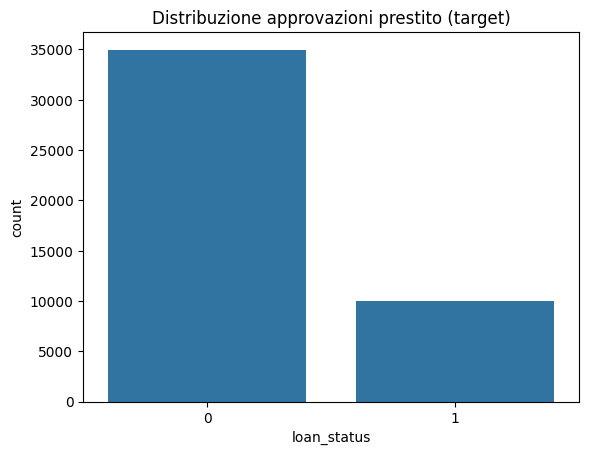

loan_status
0   0.78
1   0.22
Name: proportion, dtype: float64


In [19]:
# Analisi della variabile target
# Distribuzione della variabile target (loan_status)
sns.countplot(x=df_filtrato['loan_status'])
plt.title("Distribuzione approvazioni prestito (target)")
plt.show()

print(df_filtrato['loan_status'].value_counts(normalize=True))

# Per capire se il dataset è sbilanciato (es. se il 90% prestiti approvati allora serve bilanciamento).

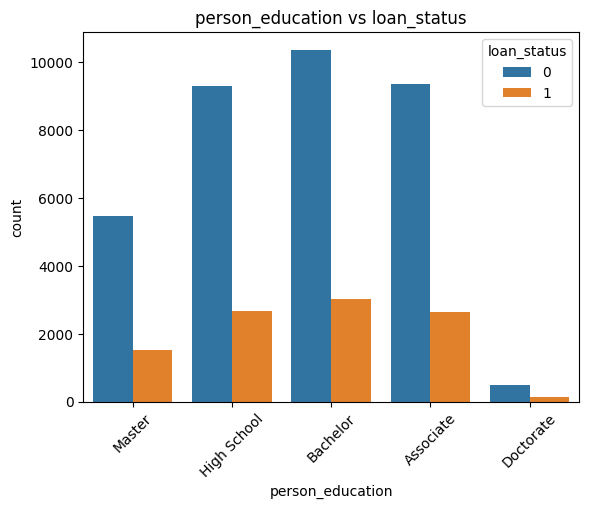

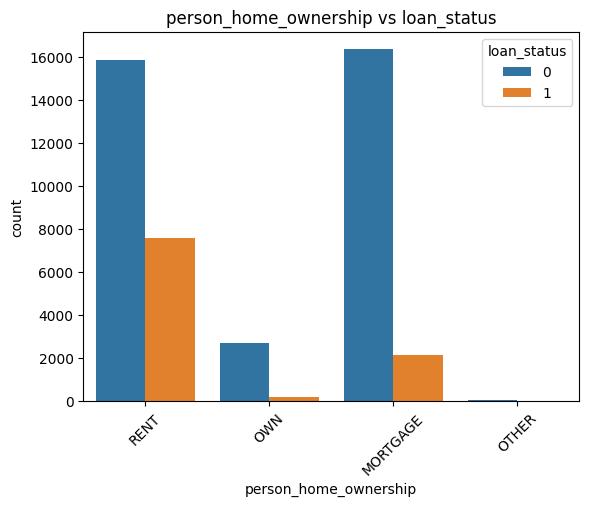

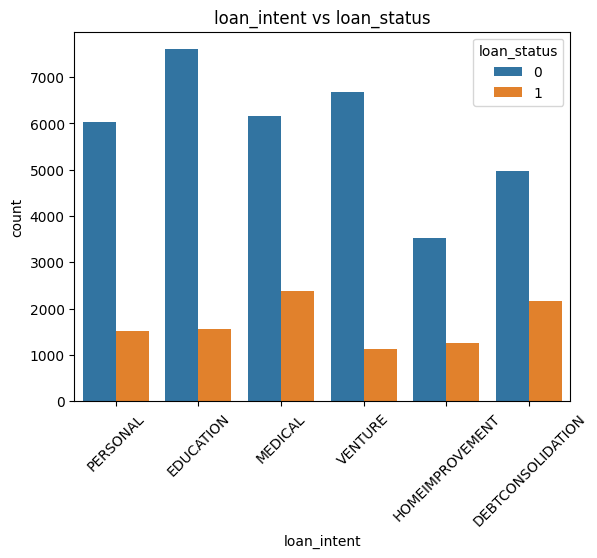

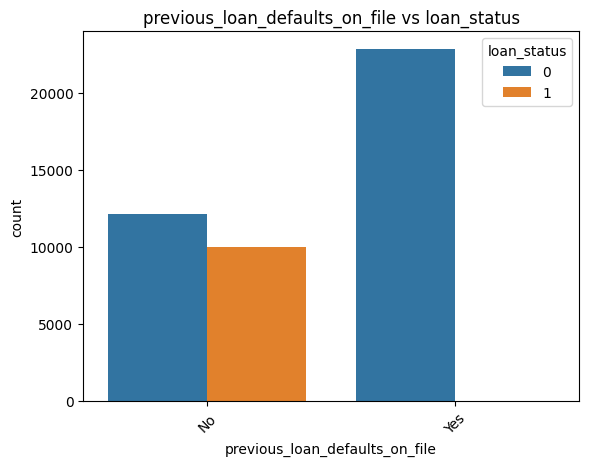

In [20]:
# Incroci tra variabili categoriche e target
# Per vedere se alcune categorie influenzano l’approvazione (es. chi ha mutuo riceve più rifiuti?)
for col in categoriche:
    sns.countplot(x=col, hue='loan_status', data=df_filtrato)
    plt.title(f'{col} vs loan_status')
    plt.xticks(rotation=45)
    plt.show()

**QUINDI** Questi grafici rafforzano quanto già avevamo ipotizzato dai grafici a barre impilate precedenti: 

*Il livello di istruzione di un richiedente non sembra essere un fattore determinante per l'approvazione o il rifiuto del prestito. Indipendentemente da quanto una persona abbia studiato, la probabilità di ottenere un prestito sembra rimanere simile, con una tendenza generale a un maggior numero di rifiuti rispetto alle approvazioni in tutte le categorie di istruzione. La differenza principale tra le categorie non è nel tasso di approvazione, ma nel numero assoluto di persone che rientrano in quella categoria.*

#### person_home_ownership
Numero Assoluto vs. Percentuale: Questo grafico mostra i conteggi assoluti. Per capire meglio l'impatto di person_home_ownership, sarebbe utile anche guardare le percentuali (come nel grafico a barre impilate al 100% che avevamo prima).

Dal grafico a barre impilate precedente, avevamo notato che la categoria OTHER aveva una percentuale di approvazione più alta rispetto alle altre. Questo grafico attuale mostra che il numero di richiedenti OTHER è in realtà molto basso. Questo significa che, pur avendo un tasso di approvazione percentuale più alto (come visto nel grafico precedente), il loro numero assoluto di prestiti approvati è minimo perché sono pochi in partenza.

*La maggior parte dei richiedenti sono in affitto (RENT) o hanno un mutuo (MORTGAGE), e per entrambe queste categorie si osserva una predominanza di prestiti rifiutati. La categoria OWN ha meno richiedenti ma un alto tasso di rifiuto. La categoria OTHER è molto rara e, sebbene potesse avere una percentuale di approvazione migliore, in termini assoluti ha pochissime approvazioni. Questo suggerisce che, in generale, l'essere in affitto o avere un mutuo non porta a un vantaggio chiaro per l'approvazione del prestito in questo dataset, e che la maggior parte dei prestiti viene comunque rifiutata in tutte le categorie.*


#### EDA Esplorazione Statistica e Rilevamento Outlier
    Capire se i dati numerici sono: Dsitribuiti in modo uniforme, sbilanciati e con Outlier
    


In [21]:
# Describe (Media,MIN/MAX,/DEVIAZIONESTANDARD,E QUARTILI):
# df_filtrato = ADESSO  person_age max 79 anni
df_filtrato.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,44990.00,44990.00,44990.00,44990.00,44990.00,44990.00,44990.00,44990.00,44990.00
mean,27.74,79908.83,5.39,9583.30,11.01,0.14,5.87,632.58,0.22
std,5.89,63323.59,5.91,6314.98,2.98,0.09,3.87,50.39,0.42
min,20.00,8000.00,0.00,500.00,5.42,0.00,2.00,390.00,0.00
25%,24.00,47195.75,1.00,5000.00,8.59,0.07,3.00,601.00,0.00
50%,26.00,67045.50,4.00,8000.00,11.01,0.12,4.00,640.00,0.00
75%,30.00,95777.00,8.00,12237.75,12.99,0.19,8.00,670.00,0.00
max,78.00,2448661.00,58.00,35000.00,20.00,0.66,30.00,784.00,1.00


In [22]:
df = df_filtrato

In [23]:
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1 
min_person_income = Q1 - 1.5 * IQR 
max_person_income = Q1 + 1.5 * IQR 
print(min_person_income)
print(max_person_income)

-25676.125
120067.625


In [24]:
# Filtraggio 'person_income'
df = df[(df['person_income'] >= min_person_income) & (df['person_income']<= max_person_income)]

df.describe()


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,38645.00,38645.00,38645.00,38645.00,38645.00,38645.00,38645.00,38645.00,38645.00
mean,27.51,63642.41,5.18,8855.89,11.00,0.15,5.73,632.26,0.24
std,5.83,24664.28,5.83,5704.81,2.97,0.09,3.83,50.34,0.43
min,20.00,8000.00,0.00,500.00,5.42,0.01,2.00,390.00,0.00
25%,23.00,44134.00,1.00,4899.00,8.59,0.08,3.00,601.00,0.00
50%,26.00,61106.00,3.00,7500.00,11.01,0.13,4.00,639.00,0.00
75%,30.00,81406.00,8.00,12000.00,13.04,0.20,8.00,669.00,0.00
max,78.00,120055.00,58.00,35000.00,20.00,0.66,30.00,784.00,1.00


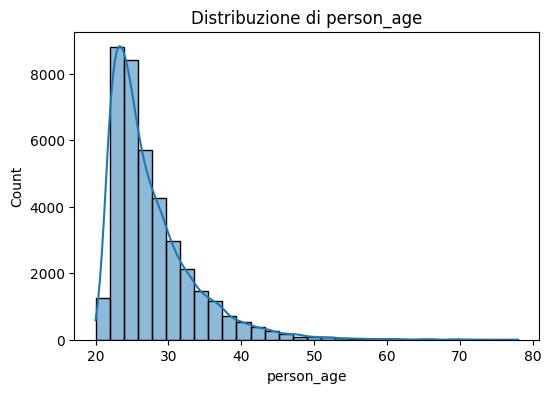

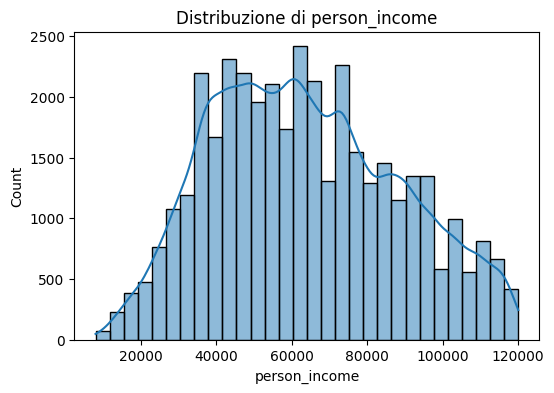

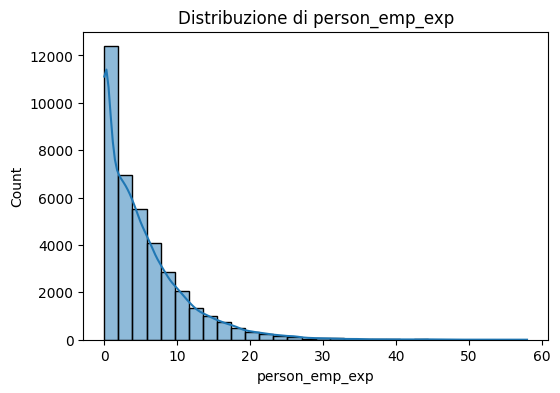

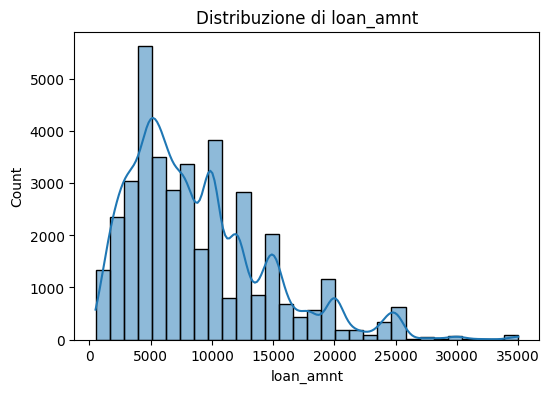

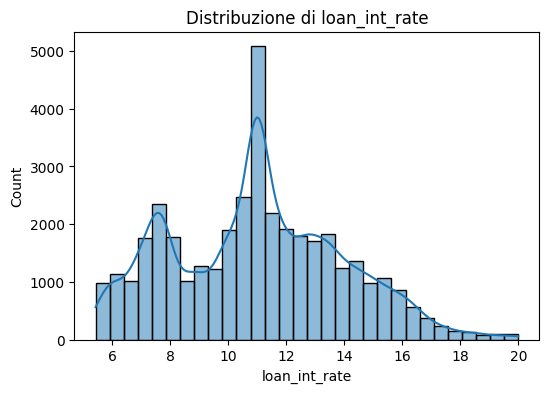

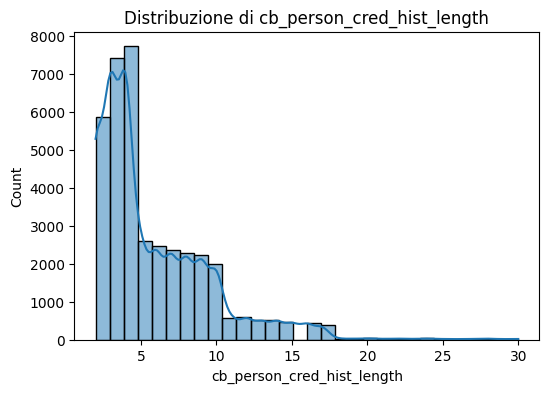

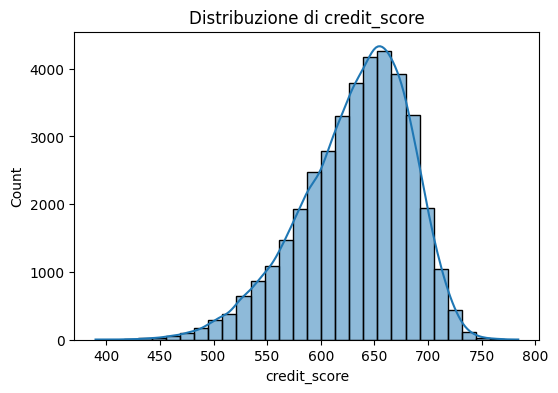

In [25]:
numeriche = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
             'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']
#in questo modo abbiamo creato una lista delle variabili numeriche e con il df filtrato andiamo ad inserirle in un ciclo for 
# che crea un istogramma per ogni variabile
for col in numeriche:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribuzione di {col}")
    plt.show()

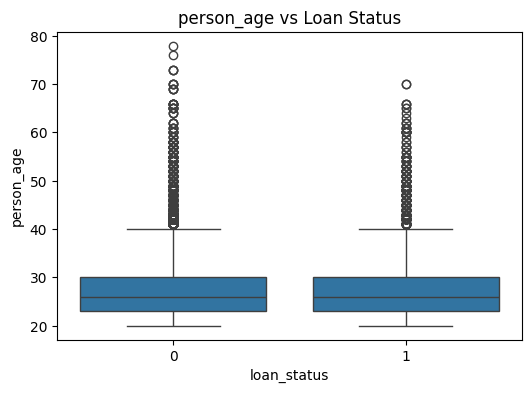

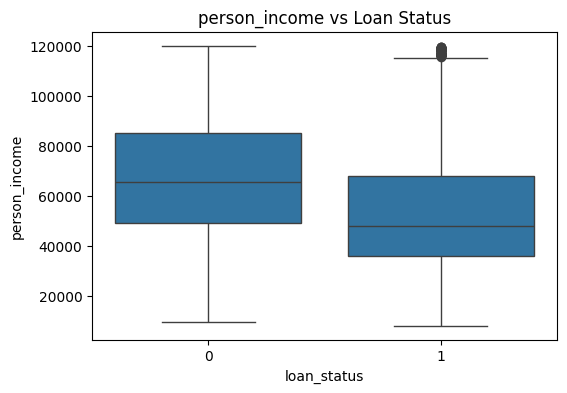

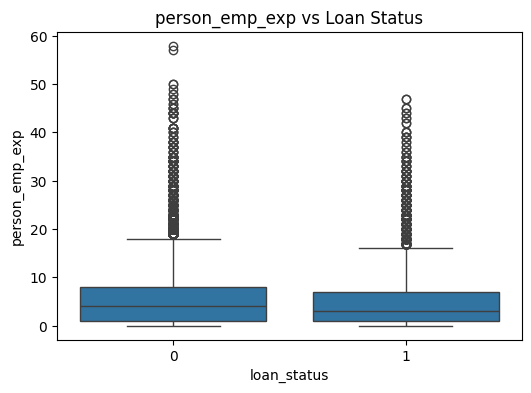

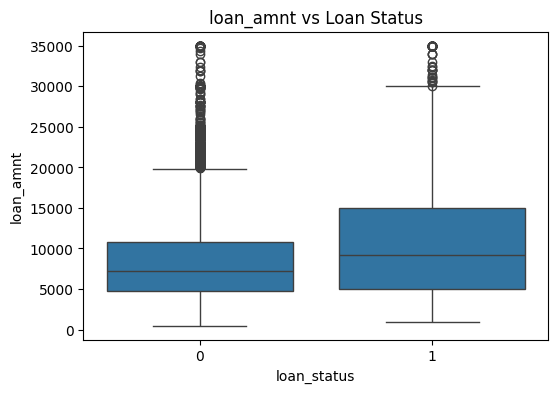

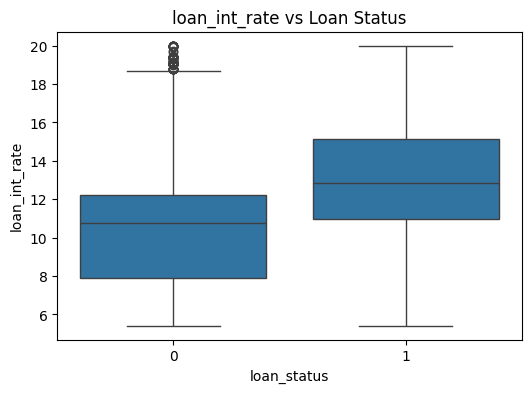

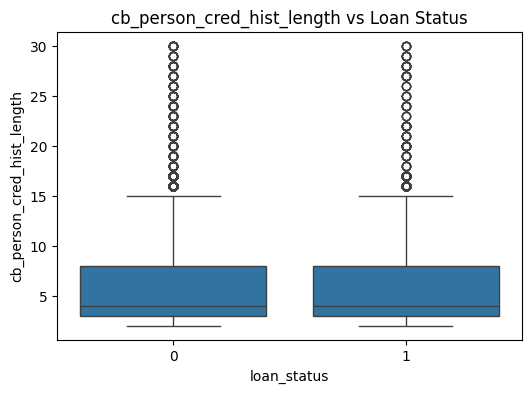

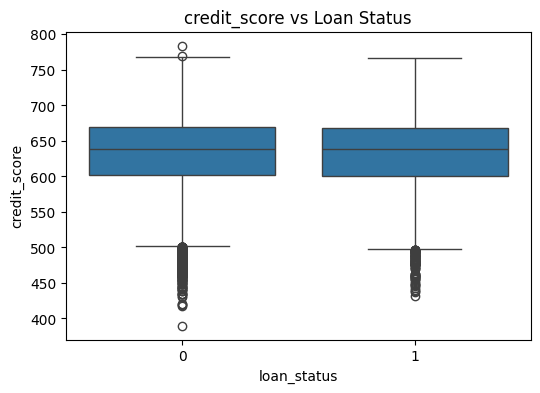

In [26]:
#BoxPlot con 'person_income' senza Outlier: 
for col in numeriche:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='loan_status', y=col, data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()

In [27]:
# Rimozione 'person_gender' 
# Rimozione valore 'OTHER' in 'person_home_ownership' 1:Sbilancia 2:Pochissimi Other 3:SensoGerarchico non definito 
# Rimozione 'person_emp_exp' verrà rimosso perchè tramite Boxplot notiamo ancora elevati Outlier dimostrando di essere una variabile non influente verso y 
# 
df = df.drop(columns=['person_gender']) 
df = df.drop(columns=['person_emp_exp'])
df = df[df['person_home_ownership'] != 'OTHER']
df


,person_age,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,Master,71948.00,RENT,35000.00,PERSONAL,16.02,0.49,3,561,No,1
1,21,High School,12282.00,OWN,1000.00,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,High School,12438.00,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3,635,No,1
3,23,Bachelor,79753.00,RENT,35000.00,MEDICAL,15.23,0.44,2,675,No,1
4,24,Master,66135.00,RENT,35000.00,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,Associate,47971.00,RENT,15000.00,MEDICAL,15.66,0.31,3,645,No,1
44996,37,Associate,65800.00,RENT,9000.00,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
44997,33,Associate,56942.00,RENT,2771.00,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
44998,29,Bachelor,33164.00,RENT,12000.00,EDUCATION,13.23,0.36,6,604,No,1


In [28]:
len(df)

38544

In [29]:
# Reset dell'index e rimozione del vecchio index:
df = df.reset_index(drop=True)
df

,person_age,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,Master,71948.00,RENT,35000.00,PERSONAL,16.02,0.49,3,561,No,1
1,21,High School,12282.00,OWN,1000.00,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,High School,12438.00,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3,635,No,1
3,23,Bachelor,79753.00,RENT,35000.00,MEDICAL,15.23,0.44,2,675,No,1
4,24,Master,66135.00,RENT,35000.00,MEDICAL,14.27,0.53,4,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38539,27,Associate,47971.00,RENT,15000.00,MEDICAL,15.66,0.31,3,645,No,1
38540,37,Associate,65800.00,RENT,9000.00,HOMEIMPROVEMENT,14.07,0.14,11,621,No,1
38541,33,Associate,56942.00,RENT,2771.00,DEBTCONSOLIDATION,10.02,0.05,10,668,No,1
38542,29,Bachelor,33164.00,RENT,12000.00,EDUCATION,13.23,0.36,6,604,No,1


In [30]:
categoriche
numeriche

['person_age',
 'person_income',
 'person_emp_exp',
 'loan_amnt',
 'loan_int_rate',
 'cb_person_cred_hist_length',
 'credit_score']

# ENCODING: 

In [31]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
No     19438
Yes    19106
Name: count, dtype: int64

In [33]:
df['person_home_ownership'] #Check rimozione 'OTHER in person_home_ownership:

0            RENT
1             OWN
2        MORTGAGE
3            RENT
4            RENT
           ...   
38539        RENT
38540        RENT
38541        RENT
38542        RENT
38543        RENT
Name: person_home_ownership, Length: 38544, dtype: object

In [34]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
# Chceck valori nulli (Non ce ne sono)
df[['person_education', 'person_home_ownership', 'previous_loan_defaults_on_file', 'loan_intent']].isna().sum()

person_education                  0
person_home_ownership             0
previous_loan_defaults_on_file    0
loan_intent                       0
dtype: int64

# Encoding per Variabili Categoriali: da 2 valori distinti (yes/no) a (1/0)

In [36]:
# Non riusciamo a usare metodo map() nonostante assenza di valori nulli e valori str senza spazi e tutto minuscolo
# Usiamo metodo apply() e inseriamo dentro parametro di apply la funzione lambda function con condizione dove il parametro di lambda function 
# coinciderà col valore della colonna in questione:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].apply(
    lambda x: 1 if str(x).strip().lower() == 'yes' else 0)



In [37]:
df

,person_age,person_education,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,Master,71948.00,RENT,35000.00,PERSONAL,16.02,0.49,3,561,0,1
1,21,High School,12282.00,OWN,1000.00,EDUCATION,11.14,0.08,2,504,1,0
2,25,High School,12438.00,MORTGAGE,5500.00,MEDICAL,12.87,0.44,3,635,0,1
3,23,Bachelor,79753.00,RENT,35000.00,MEDICAL,15.23,0.44,2,675,0,1
4,24,Master,66135.00,RENT,35000.00,MEDICAL,14.27,0.53,4,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
38539,27,Associate,47971.00,RENT,15000.00,MEDICAL,15.66,0.31,3,645,0,1
38540,37,Associate,65800.00,RENT,9000.00,HOMEIMPROVEMENT,14.07,0.14,11,621,0,1
38541,33,Associate,56942.00,RENT,2771.00,DEBTCONSOLIDATION,10.02,0.05,10,668,0,1
38542,29,Bachelor,33164.00,RENT,12000.00,EDUCATION,13.23,0.36,6,604,0,1


# DA ADESSO IN POI si fa ENCODING(One-Hot Encoding per Regressione logistica) SU COLONNE CON PIù VALORI
### Ora df_regrLog = df.copy()
### df_regrLog lo abbiamo creato perchè qui si fa One-Hot Encoding (Inferenza e Predizione Regressione Logistica) su variabili con più valori diversi
#### poi quando faremo LabelEncoding per modello DecisionTree e RandomForest, semore copiando df principale creaimo nuovo df_decisionTree e df_randomForest 

In [38]:
# Questo df_regrLog avrà il contenuto del df pulito originale e avrà due sottocategorie di df per inferenza e predizione 
# INFERENZA : senza 'loan_percent_income', PREDIZIONE : con 'loan_percent_income'
# e gli facciamo l'encoding specifico (One-Hot Encoding) di Regressione Logistica
df_regrLog = df.copy()


In [39]:
# One-Hot Encoding su variabili categoriali rimaste:
df_regrLog = pd.get_dummies(df_regrLog, columns=['person_education','person_home_ownership', 'loan_intent'], drop_first=True)
df_regrLog


,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,71948.00,35000.00,16.02,0.49,3,561,0,1,False,False,False,True,False,True,False,False,False,True,False
1,21,12282.00,1000.00,11.14,0.08,2,504,1,0,False,False,True,False,True,False,True,False,False,False,False
2,25,12438.00,5500.00,12.87,0.44,3,635,0,1,False,False,True,False,False,False,False,False,True,False,False
3,23,79753.00,35000.00,15.23,0.44,2,675,0,1,True,False,False,False,False,True,False,False,True,False,False
4,24,66135.00,35000.00,14.27,0.53,4,586,0,1,False,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38539,27,47971.00,15000.00,15.66,0.31,3,645,0,1,False,False,False,False,False,True,False,False,True,False,False
38540,37,65800.00,9000.00,14.07,0.14,11,621,0,1,False,False,False,False,False,True,False,True,False,False,False
38541,33,56942.00,2771.00,10.02,0.05,10,668,0,1,False,False,False,False,False,True,False,False,False,False,False
38542,29,33164.00,12000.00,13.23,0.36,6,604,0,1,True,False,False,False,False,True,True,False,False,False,False


### Definizione nuovi df(di Regressione logistica) per INFERENZA e PREDIZIONE

In [40]:
df_regrLog_inf = df_regrLog.copy() # df_regrLog_inf, df usato per Inferenza
df_regrLog_pred = df_regrLog.copy() # df_regrLog_pred, df usato per Predizione

In [41]:
# Rimozione colonna 'loan_percent_income' per calcolo INFERENZA migliorato:
df_regrLog_inf = df_regrLog_inf.drop(columns=['loan_percent_income'])
df_regrLog_inf

,person_age,person_income,loan_amnt,loan_int_rate,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,71948.00,35000.00,16.02,3,561,0,1,False,False,False,True,False,True,False,False,False,True,False
1,21,12282.00,1000.00,11.14,2,504,1,0,False,False,True,False,True,False,True,False,False,False,False
2,25,12438.00,5500.00,12.87,3,635,0,1,False,False,True,False,False,False,False,False,True,False,False
3,23,79753.00,35000.00,15.23,2,675,0,1,True,False,False,False,False,True,False,False,True,False,False
4,24,66135.00,35000.00,14.27,4,586,0,1,False,False,False,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38539,27,47971.00,15000.00,15.66,3,645,0,1,False,False,False,False,False,True,False,False,True,False,False
38540,37,65800.00,9000.00,14.07,11,621,0,1,False,False,False,False,False,True,False,True,False,False,False
38541,33,56942.00,2771.00,10.02,10,668,0,1,False,False,False,False,False,True,False,False,False,False,False
38542,29,33164.00,12000.00,13.23,6,604,0,1,True,False,False,False,False,True,True,False,False,False,False


In [42]:
# Trasformiamo i True e False nelle dummies in 1/0 per essere più puliti con ciclo for:
for column in df_regrLog:
    if df_regrLog[column].dtype == bool:
        df_regrLog[column] = df_regrLog[column].astype(int)

In [43]:
df_regrLog


,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22,71948.00,35000.00,16.02,0.49,3,561,0,1,0,0,0,1,0,1,0,0,0,1,0
1,21,12282.00,1000.00,11.14,0.08,2,504,1,0,0,0,1,0,1,0,1,0,0,0,0
2,25,12438.00,5500.00,12.87,0.44,3,635,0,1,0,0,1,0,0,0,0,0,1,0,0
3,23,79753.00,35000.00,15.23,0.44,2,675,0,1,1,0,0,0,0,1,0,0,1,0,0
4,24,66135.00,35000.00,14.27,0.53,4,586,0,1,0,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38539,27,47971.00,15000.00,15.66,0.31,3,645,0,1,0,0,0,0,0,1,0,0,1,0,0
38540,37,65800.00,9000.00,14.07,0.14,11,621,0,1,0,0,0,0,0,1,0,1,0,0,0
38541,33,56942.00,2771.00,10.02,0.05,10,668,0,1,0,0,0,0,0,1,0,0,0,0,0
38542,29,33164.00,12000.00,13.23,0.36,6,604,0,1,1,0,0,0,0,1,1,0,0,0,0


# Separazione x e y per INFERENZA e PREDIZIONE di RegressioneLogistica(Encoding One hot dentro + encoding di base):

In [44]:
X = df_regrLog_inf.drop(columns=['loan_status'])
Y = df_regrLog_inf['loan_status']


In [45]:
# Aggiunta intercetta E la rendiamo int con ciclo for:
X_const = sm.add_constant(X)
for column in X_const.columns:
    if X_const[column].dtype == bool:
        X_const[column] = X_const[column].astype(int)

In [46]:
print(X_const.dtypes)

const                             float64
person_age                          int64
person_income                     float64
loan_amnt                         float64
loan_int_rate                     float64
cb_person_cred_hist_length          int64
credit_score                        int64
previous_loan_defaults_on_file      int64
person_education_Bachelor           int64
person_education_Doctorate          int64
person_education_High School        int64
person_education_Master             int64
person_home_ownership_OWN           int64
person_home_ownership_RENT          int64
loan_intent_EDUCATION               int64
loan_intent_HOMEIMPROVEMENT         int64
loan_intent_MEDICAL                 int64
loan_intent_PERSONAL                int64
loan_intent_VENTURE                 int64
dtype: object


In [47]:
# Creazione Modello Logit (INFERENZA - Regressione Logistica): 
# Aggiungiamo n° Iterazioni MAX per evitare errori:

model = sm.Logit(Y, X_const)
result = model.fit(maxiter=100)

         Current function value: 0.238105
         Iterations: 100


c:\Users\ale_2\Desktop\Develhope\Progetti\customer_SCORIN1.0\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
# Visualizzazione Inferenza(RegressioneLogistica con Logit):
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                38544
Model:                          Logit   Df Residuals:                    38525
Method:                           MLE   Df Model:                           18
Date:                Wed, 28 May 2025   Pseudo R-squ.:                  0.5714
Time:                        17:14:44   Log-Likelihood:                -9177.5
converged:                      False   LL-Null:                       -21413.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              3.6709      0.299     12.258      0.000       3.084       4.258
person_age                         0.0026      0.006      0.401      0.

In [49]:
# DA QUI sappiamo che:
# person_age da RIMUOVERE (p-value > 0.05)

# Encoding per Variabili Categoriali: Metodo One-Hot Encoding(con regola)

# RESOCONTO: 
### Il CSV (df) contiene variabili:
### Età, Educazione, Reddito Annuo, Tipo Proprietà Abitazione, Somma Richiesta Prestito, Motivo Prestito, Tasso Interesse Prestito(A FINE ANNO DA DARE % specifica di Somma Richiesta + Somma Richiesta), % di Reddito Annuo Corrispondente alla Somma Richiesta (> 0.5 RISCHIO default), Anni Storia Creditizia Bancaria, Punteggio, Precedenti Non Pagamenti